In [117]:
# Importation des bibliothéques utiles pour l'analyse
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [118]:
# Chargement de notre DataFrame 
data=pd.read_csv("C:/Users/User/Desktop/Projet_ML/Telco-Customer-Churn1.csv")
data.head(3)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved


In [119]:
var_to_drop=['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude',
             'Churn Label', 'CLTV','Churn Score', 'Churn Reason']

In [120]:
#suppression des variables unutiles
data=data.drop(columns=var_to_drop)

In [121]:
# Convertion en type numérique
data['Total Charges']=pd.to_numeric(data['Total Charges'],errors='coerce')


In [122]:
# on va supprimer les 11 valeur manquantes de la variable 'Total Charges
data=data.dropna()

In [123]:
data.shape

(7032, 20)

In [124]:
#liste des variables a encoder 
col_to_encoder=['Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method']

In [125]:
data_encod=pd.get_dummies(data[col_to_encoder],drop_first=True)
data_num=data[['Tenure Months','Monthly Charges','Total Charges','Churn Value']]
data=pd.concat([data_encod,data_num],axis=1)
data

,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,...,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Tenure Months,Monthly Charges,Total Charges,Churn Value
0,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,2,53.85,108.15,1
1,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,1,0,2,70.70,151.65,1
2,0,0,0,1,1,0,1,1,0,0,...,0,0,1,0,1,0,8,99.65,820.50,1
3,0,0,1,1,1,0,1,1,0,0,...,0,0,1,0,1,0,28,104.80,3046.05,1
4,1,0,0,1,1,0,1,1,0,0,...,0,0,1,0,0,0,49,103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,1,0,0,0,1,1,...,0,1,1,0,0,0,72,21.15,1419.40,0
7039,1,0,1,1,1,0,1,0,0,0,...,1,0,1,0,0,1,24,84.80,1990.50,0
7040,0,0,1,1,1,0,1,1,0,0,...,1,0,1,1,0,0,72,103.20,7362.90,0
7041,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,1,0,11,29.60,346.45,0


In [126]:
y=data['Churn Value']
y
x=data.drop(columns='Churn Value')
print(x.shape)
print(y.shape)

(7032, 30)
(7032,)


In [127]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify = y)


In [128]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()


x_train[['Tenure Months','Monthly Charges','Total Charges']]=scaler.fit_transform(x_train[['Tenure Months','Monthly Charges','Total Charges']])
x_test[['Tenure Months','Monthly Charges','Total Charges']]=scaler.transform(x_test[['Tenure Months','Monthly Charges','Total Charges']])


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

## Selection Features with `Correlation between features`

In [129]:
def correlatedFeatures(dataset, threshold):
    correlated_columns = set()
    correlations = dataset.corr()
    for i in range(len(correlations)):
        for j in range(i):
            if abs(correlations.iloc[i,j]) > threshold:
                correlated_columns.add(correlations.columns[i])
    return correlated_columns

In [132]:
cf = correlatedFeatures(x_train, 0.85)
cf

{'Device Protection_No internet service',
 'Multiple Lines_No phone service',
 'Online Backup_No internet service',
 'Online Security_No internet service',
 'Streaming Movies_No internet service',
 'Streaming TV_No internet service',
 'Tech Support_No internet service'}

In [133]:
x_train = x_train.drop(cf, axis=1)
x_test = x_test.drop(cf, axis=1)
print(x_train.shape)
print(x_test.shape)


(4922, 23)
(2110, 23)


In [115]:
x_train.columns

Index(['Gender_Male', 'Senior Citizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'Phone Service_Yes', 'Multiple Lines_Yes',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_Yes', 'Online Backup_Yes', 'Device Protection_Yes',
       'Tech Support_Yes', 'Streaming TV_Yes', 'Streaming Movies_Yes',
       'Contract_One year', 'Contract_Two year', 'Paperless Billing_Yes',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check',
       'Tenure Months', 'Monthly Charges', 'Total Charges'],
      dtype='object')

## Application du modele KNeighborsClassifier

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid={'n_neighbors' : np.arange(1,51),
           'metric': ['euclidean' ,'manhattan','minkowski'],
           'weights' :[ 'uniform','distance']} #dictionaire qui contient les paramtres qu'on veut regler
KNeighborsClassifier()
knn_grid=GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=5)

knn_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'weights': ['uniform', 'distance']})

In [147]:
knn_grid.best_params_


{'metric': 'manhattan', 'n_neighbors': 32, 'weights': 'uniform'}

In [152]:

knn_model=KNeighborsClassifier(n_neighbors=35,metric='euclidean')

knn_model.fit(x_train,y_train)

print('score du train ' ,knn_model.score(x_train,y_train))
print('score du test' ,knn_model.score(x_test,y_test))

score du train  0.8086143843965867
score du test 0.7985781990521327


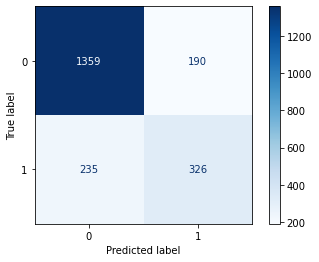

In [153]:
from sklearn.metrics import plot_confusion_matrix

y_pred=knn_model.predict(x_test)
plot_confusion_matrix(knn_model,x_test,y_test,cmap=plt.cm.Blues);

In [154]:
from sklearn.metrics import classification_report

y_pred=knn_model.predict(x_test)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.852572  0.877340  0.864779      1549
           1   0.631783  0.581105  0.605385       561

    accuracy                       0.798578      2110
   macro avg   0.742178  0.729223  0.735082      2110
weighted avg   0.793869  0.798578  0.795812      2110



In [155]:
from sklearn.metrics import roc_curve
y_scores = knn_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

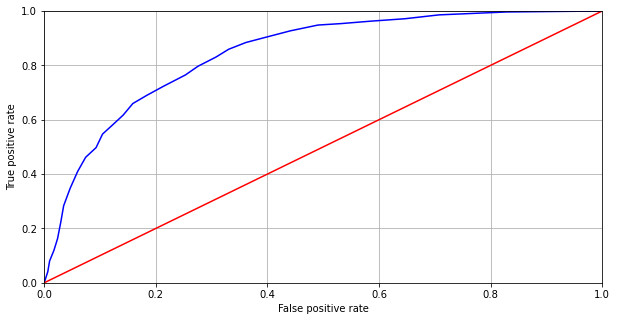

In [156]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [157]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8431942176483246

## Application du modele DecisionTreeClassifier

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param={'criterion': ['gini','entropy'],    
      'max_depth' :np.arange(1,10)
      } 

tree_grid= GridSearchCV(DecisionTreeClassifier(),param_grid=param,cv=5)
tree_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [160]:
tree_grid.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [168]:
tree_model=DecisionTreeClassifier(criterion='gini',max_depth=7,random_state=0)
tree_model.fit(x_train,y_train)
print('train score : ', tree_model.score(x_train,y_train))
print('test score : ', tree_model.score(x_test,y_test))

train score :  0.8216172287687932
test score :  0.7914691943127962


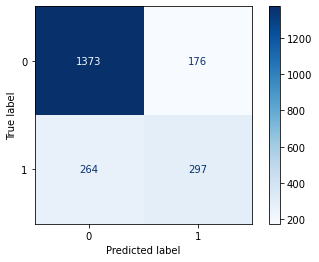

In [169]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree_model,x_test,y_test,cmap=plt.cm.Blues);

In [170]:
from sklearn.metrics import classification_report

y_pred=tree_model.predict(x_test)
print(classification_report(y_test,y_pred,digits=6))

              precision    recall  f1-score   support

           0   0.838729  0.886378  0.861896      1549
           1   0.627907  0.529412  0.574468       561

    accuracy                       0.791469      2110
   macro avg   0.733318  0.707895  0.718182      2110
weighted avg   0.782677  0.791469  0.785475      2110



In [171]:
from sklearn.metrics import roc_curve
y_scores = tree_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

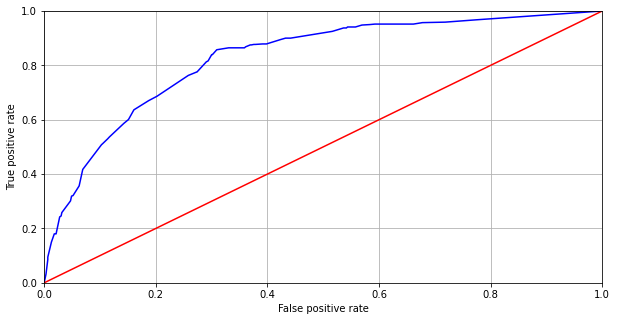

In [172]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [173]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8260363479859929

In [176]:
names=['Gender_Male', 'Senior Citizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'Phone Service_Yes', 'Multiple Lines_Yes',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_Yes', 'Online Backup_Yes', 'Device Protection_Yes',
       'Tech Support_Yes', 'Streaming TV_Yes', 'Streaming Movies_Yes',
       'Contract_One year', 'Contract_Two year', 'Paperless Billing_Yes',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check',
       'Tenure Months', 'Monthly Charges', 'Total Charges']

In [177]:
for var, importance in zip(names, tree_model.feature_importances_):
    if importance != 0:
        print(var, importance)

Gender_Male 0.004864437133380703
Senior Citizen_Yes 0.003455346883486682
Partner_Yes 0.015190615043939357
Dependents_Yes 0.07150956929491235
Phone Service_Yes 0.00931435070575762
Multiple Lines_Yes 0.012874466013794347
Internet Service_Fiber optic 0.2570849520932638
Internet Service_No 0.03428576034696888
Online Security_Yes 0.0010977955106569366
Online Backup_Yes 0.005282071523460251
Device Protection_Yes 0.0017529243871176646
Tech Support_Yes 0.007068686313682243
Streaming TV_Yes 0.012462634812807844
Streaming Movies_Yes 0.005009742779590742
Contract_One year 0.020885157723207048
Contract_Two year 0.010674155087424798
Paperless Billing_Yes 0.004117822782987245
Payment Method_Electronic check 0.02539700672288142
Payment Method_Mailed check 0.006023185231120865
Tenure Months 0.37297025719334287
Monthly Charges 0.04131477397890462
Total Charges 0.07736428843731172


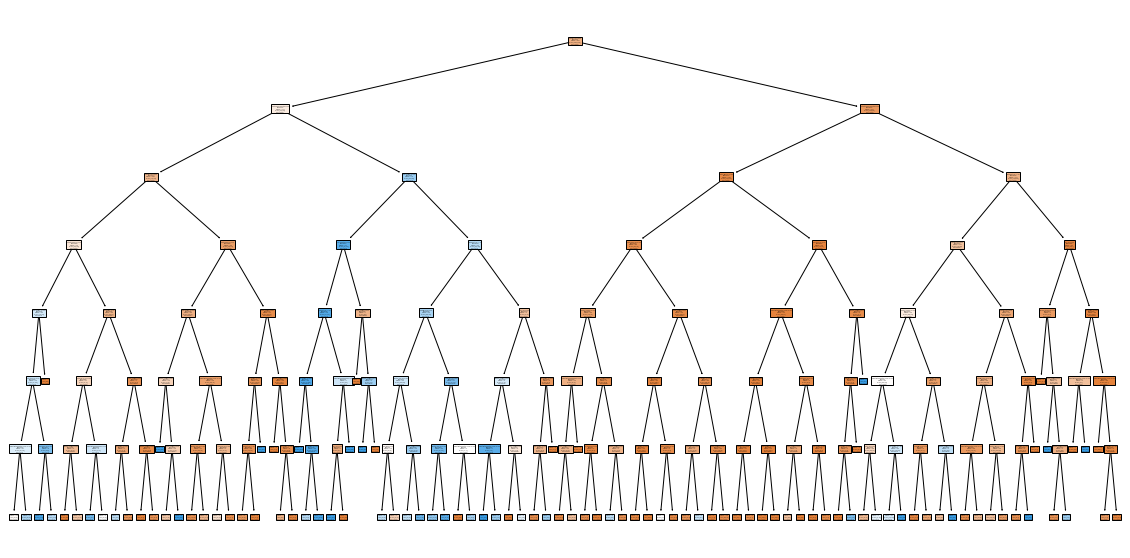

In [178]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
c=['quitter', 'rester']
plot_tree(tree_model, feature_names= names, class_names=c, filled=True)
plt.show()

In [179]:
from sklearn.tree import export_text

print(export_text(tree_model,feature_names=names))

|--- Tenure Months <= 0.22
|   |--- Internet Service_Fiber optic <= 0.50
|   |   |--- Tenure Months <= 0.04
|   |   |   |--- Internet Service_No <= 0.50
|   |   |   |   |--- Total Charges <= 0.02
|   |   |   |   |   |--- Senior Citizen_Yes <= 0.50
|   |   |   |   |   |   |--- Payment Method_Electronic check <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Payment Method_Electronic check >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Senior Citizen_Yes >  0.50
|   |   |   |   |   |   |--- Phone Service_Yes <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Phone Service_Yes >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Total Charges >  0.02
|   |   |   |   |   |--- class: 0
|   |   |   |--- Internet Service_No >  0.50
|   |   |   |   |--- Total Charges <= 0.00
|   |   |   |   |   |--- Paperless Billing_Yes <= 0.50
|   |   |   |   |   |   |--- Monthly Charges <= 0.01
|   |   |  

## Application du modele NaiveBayes

In [180]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}
scores = {}
for key, model in nb.items():   #nb.items; parcourir cle et valeur
    s = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.7626920061078784,
 'bernoulli': 0.7828040526598159,
 'multinomial': 0.7862605752961083}

In [181]:
bayes_model = MultinomialNB()
bayes_model.fit(x_train, y_train)
print('train score : ' ,bayes_model.score(x_train,y_train))
print('test score : ' , bayes_model.score(x_test,y_test))

train score :  0.7870784234051199
test score :  0.7985781990521327


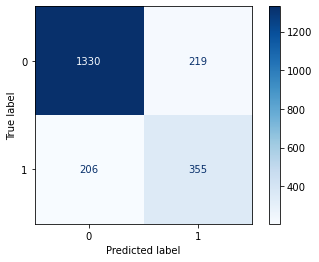

In [182]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(bayes_model,x_test,y_test,cmap=plt.cm.Blues);

In [183]:
from sklearn.metrics import classification_report

y_predi=bayes_model.predict(x_test)

print(classification_report(y_test,y_predi,digits=5))

              precision    recall  f1-score   support

           0    0.86589   0.85862   0.86224      1549
           1    0.61847   0.63280   0.62555       561

    accuracy                        0.79858      2110
   macro avg    0.74218   0.74571   0.74389      2110
weighted avg    0.80010   0.79858   0.79931      2110



In [184]:
from sklearn.metrics import roc_curve
y_scores = bayes_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

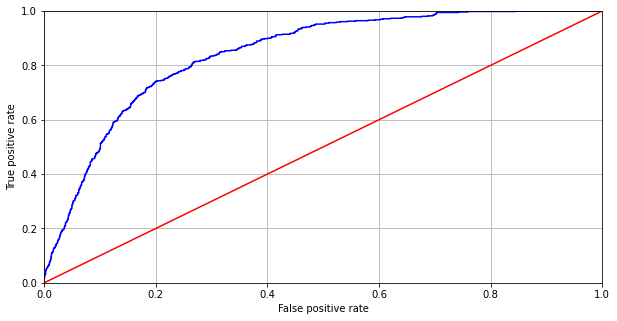

In [185]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [186]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8425141169796165

## Aplication du modele LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


log = LogisticRegression(random_state=0)
param =  {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
          'C' : np.linspace(0,10, 100),
          'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
          'max_iter': [100,1000, 2000, 3000]}

grid = GridSearchCV(log, param_grid=param, cv =5, n_jobs=-1)
grid.fit(x_train, y_train)

In [51]:
grid.best_params_

{'C': 1.3131313131313131,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [195]:
logre_model = LogisticRegression(random_state=0, C=1.31313, penalty = 'l1', solver='liblinear')
logre_model.fit(x_train, y_train)

print('train score : ' , logre_model.score(x_train, y_train) )
print('test score : ' , logre_model.score(x_test,y_test) )

train score :  0.8108492482730597
test score :  0.8090047393364929


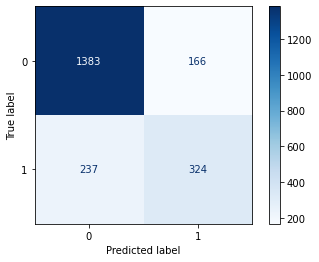

In [196]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(logre_model,x_test,y_test,cmap=plt.cm.Blues);

In [197]:
y_predi=logre_model.predict(x_test)

print(classification_report(y_test,y_predi,digits=5))

              precision    recall  f1-score   support

           0    0.85370   0.89283   0.87283      1549
           1    0.66122   0.57754   0.61656       561

    accuracy                        0.80900      2110
   macro avg    0.75746   0.73519   0.74469      2110
weighted avg    0.80253   0.80900   0.80469      2110



In [198]:
from sklearn.metrics import roc_curve
y_scores = logre_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

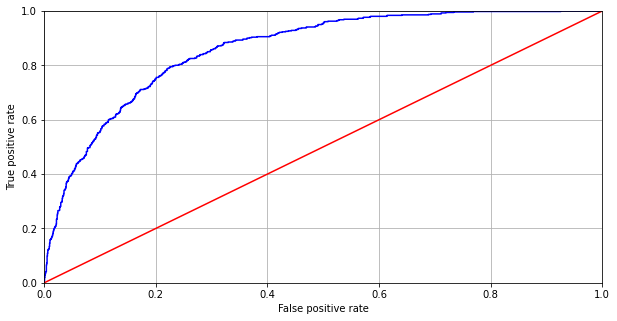

In [199]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [200]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8599619788052554

## Aplication du modele RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param={'criterion': ['gini','entropy'],    
      'max_depth' :np.arange(1,10),
      } 

random_grid= GridSearchCV(RandomForestClassifier(),param_grid=param,cv=5)
random_grid.fit(x_train,y_train)



In [135]:
random_grid.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [143]:
random_model=RandomForestClassifier(criterion='gini', max_depth=9,random_state=81)
random_model.fit(x_train,y_train)

print('train score : ' ,random_model.score(x_train,y_train))
print('test score : ' ,random_model.score(x_test,y_test))


train score :  0.8567655424624137
test score :  0.814218009478673


In [137]:
maxi=0
max_score=0
for i in  np.arange(1,100):
    
    random_model=RandomForestClassifier(criterion='gini', max_depth=9,random_state=i)
    random_model.fit(x_train,y_train)
    
    score=random_model.score(x_test,y_test)
    if score > max_score : 
        max_score=score
        maxi=i

print(maxi)

81


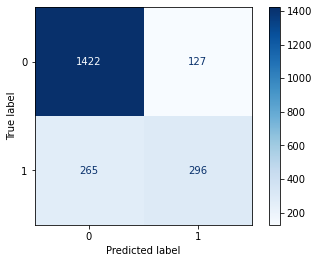

In [144]:
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(random_model,x_test,y_test,cmap=plt.cm.Blues);

In [145]:
y_predi=random_model.predict(x_test)

print(classification_report(y_test,y_predi,digits=5))

              precision    recall  f1-score   support

           0    0.84292   0.91801   0.87886      1549
           1    0.69976   0.52763   0.60163       561

    accuracy                        0.81422      2110
   macro avg    0.77134   0.72282   0.74024      2110
weighted avg    0.80486   0.81422   0.80515      2110



In [202]:
from sklearn.metrics import roc_curve
y_scores = random_model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])

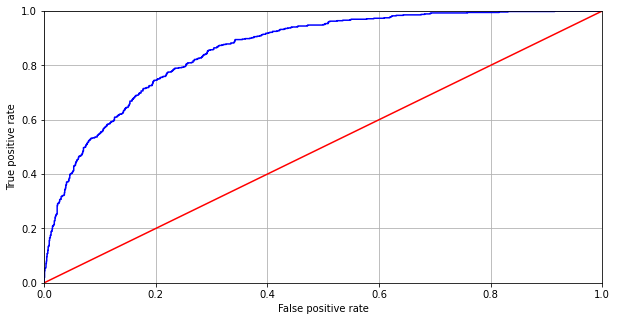

In [203]:
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, 'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.show()

In [204]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8597744045091479

## Summary table 
## Selection Feature : `Correlation between features ` (with 23 features)

In [205]:
# Regardons la construction d'une DataFrame
import numpy as np
import pandas as pd

l=['KNeighborsClassifier','DecisionTreeClassifier','NaiveBayes(MultiNomial)','LogisticRegression','RandomForestClassifier']
train_score = pd.Series([0.8086,0.8216,0.7870,0.8108,0.8567], index=l)
test_score = pd.Series([0.7985,0.7914,0.7985,0.8090,0.8142], index=l)
f1_score_rester = pd.Series([0.8647,0.8618,0.8622,0.8728,0.8788], index=l)

f1_score_quitter = pd.Series([0.6053,0.5744,0.6255,0.6165,0.6016], index=l)
accuary = pd.Series([0.7985,0.7914,0.7985,0.8090,0.8142], index=l)
auc = pd.Series([0.8431,0.8260,0.8425,0.8599,0.8597], index=l)



In [207]:
stat = pd.DataFrame({'train_score': train_score,
                    'test_score ' : test_score,
                    'f1_score_rester': f1_score_rester,
                    'f1_score_quitter': f1_score_quitter ,
                   'accuary': accuary,
                   'AUC': auc})
stat


,train_score,test_score,f1_score_rester,f1_score_quitter,accuary,AUC
KNeighborsClassifier,0.8086,0.7985,0.8647,0.6053,0.7985,0.8431
DecisionTreeClassifier,0.8216,0.7914,0.8618,0.5744,0.7914,0.8260
NaiveBayes(MultiNomial),0.7870,0.7985,0.8622,0.6255,0.7985,0.8425
LogisticRegression,0.8108,0.8090,0.8728,0.6165,0.8090,0.8599
RandomForestClassifier,0.8567,0.8142,0.8788,0.6016,0.8142,0.8597


## Selection Feature : `Correlation between features ` (with 23 features)